In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [144]:

df = pd.read_csv("FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv")


In [145]:
df.head(25)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023
5,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,130.0,NaN,0.9330,15.4544,16.5637,16,07/01/2020,06/30/2023
6,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
7,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8497,4.2346,4.9836,Too Few to Report,07/01/2020,06/30/2023
8,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-HF-HRRP,176.0,NaN,0.9935,20.1511,20.2835,35,07/01/2020,06/30/2023
9,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-PN-HRRP,305.0,NaN,0.8495,13.3621,15.7296,30,07/01/2020,06/30/2023


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               18510 non-null  object 
 1   Facility ID                 18510 non-null  int64  
 2   State                       18510 non-null  object 
 3   Measure Name                18510 non-null  object 
 4   Number of Discharges        8340 non-null   float64
 5   Footnote                    6583 non-null   float64
 6   Excess Readmission Ratio    11927 non-null  float64
 7   Predicted Readmission Rate  11927 non-null  float64
 8   Expected Readmission Rate   11927 non-null  float64
 9   Number of Readmissions      11927 non-null  object 
 10  Start Date                  18510 non-null  object 
 11  End Date                    18510 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [151]:
df.isnull().sum()/len(df)*100

Facility Name                  0.000000
Facility ID                    0.000000
State                          0.000000
Measure Name                   0.000000
Number of Discharges          54.943274
Footnote                      64.435440
Excess Readmission Ratio      35.564560
Predicted Readmission Rate    35.564560
Expected Readmission Rate     35.564560
Number of Readmissions        35.564560
Start Date                     0.000000
End Date                       0.000000
dtype: float64

In [153]:
df.replace(to_replace=np.NAN,value=0)

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,0.0,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,0.0,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,0.0,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,0.0,0.0,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,0.0,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
18505,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HIP-KNEE-HRRP,0.0,5.0,0.0000,0.0000,0.0000,0,07/01/2020,06/30/2023
18506,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HF-HRRP,0.0,5.0,0.0000,0.0000,0.0000,0,07/01/2020,06/30/2023
18507,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-COPD-HRRP,0.0,5.0,0.0000,0.0000,0.0000,0,07/01/2020,06/30/2023
18508,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-CABG-HRRP,0.0,5.0,0.0000,0.0000,0.0000,0,07/01/2020,06/30/2023


In [155]:
df.shape

(18510, 12)

In [157]:
df.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [159]:
df.isnull()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18505,False,False,False,False,True,False,True,True,True,True,False,False
18506,False,False,False,False,True,False,True,True,True,True,False,False
18507,False,False,False,False,True,False,True,True,True,True,False,False
18508,False,False,False,False,True,False,True,True,True,True,False,False


In [161]:
df.isnull().sum()

Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges          10170
Footnote                      11927
Excess Readmission Ratio       6583
Predicted Readmission Rate     6583
Expected Readmission Rate      6583
Number of Readmissions         6583
Start Date                        0
End Date                          0
dtype: int64

In [163]:
df.fillna(method='ffill', inplace=True)

In [165]:
df.dtypes

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [167]:
#Which states have the highest average excess readmission ratios?

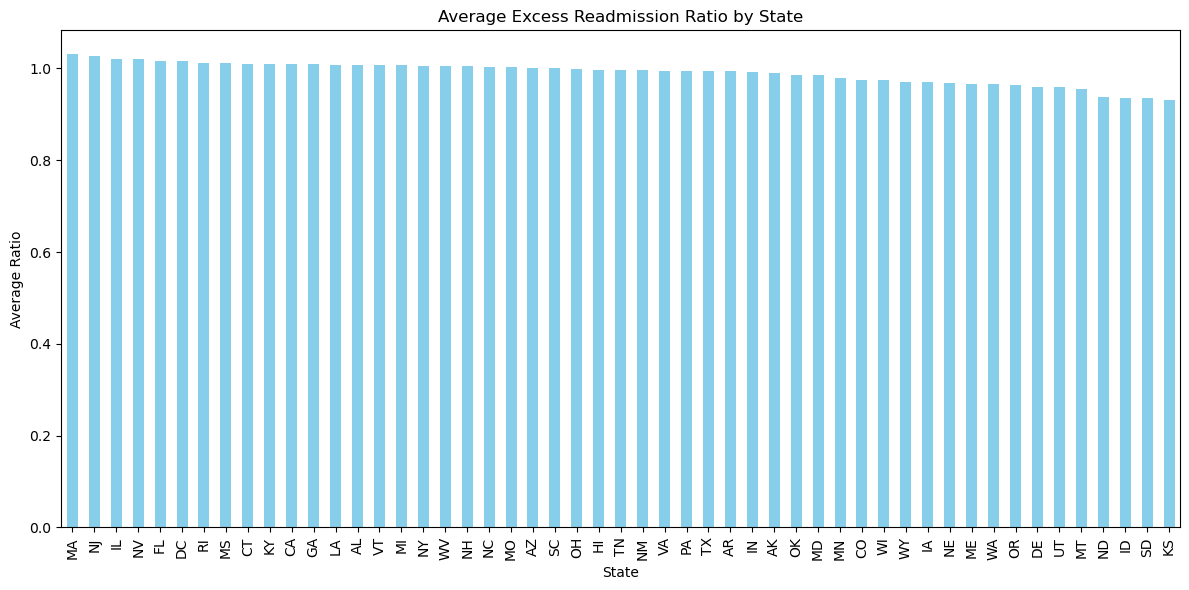

In [169]:
state_avg_excess = df.groupby('State')['Excess Readmission Ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
state_avg_excess.plot(kind='bar', color='skyblue')
plt.title('Average Excess Readmission Ratio by State')
plt.ylabel('Average Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [170]:
#Which hospitals have the highest number of readmissions?

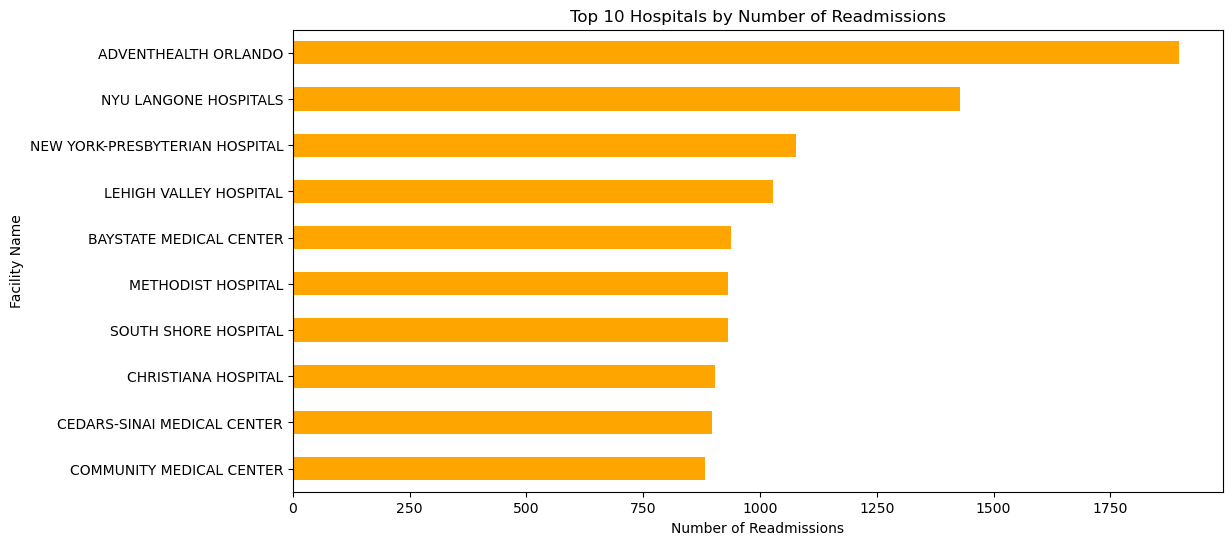

In [173]:
df['Number of Readmissions'] = pd.to_numeric(df['Number of Readmissions'], errors='coerce')
top_hospitals = df.groupby('Facility Name')['Number of Readmissions'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_hospitals.plot(kind='barh', color='orange')
plt.title('Top 10 Hospitals by Number of Readmissions')
plt.xlabel('Number of Readmissions')
plt.gca().invert_yaxis()
plt.show()

In [175]:
#What is the average number of discharges for each state?

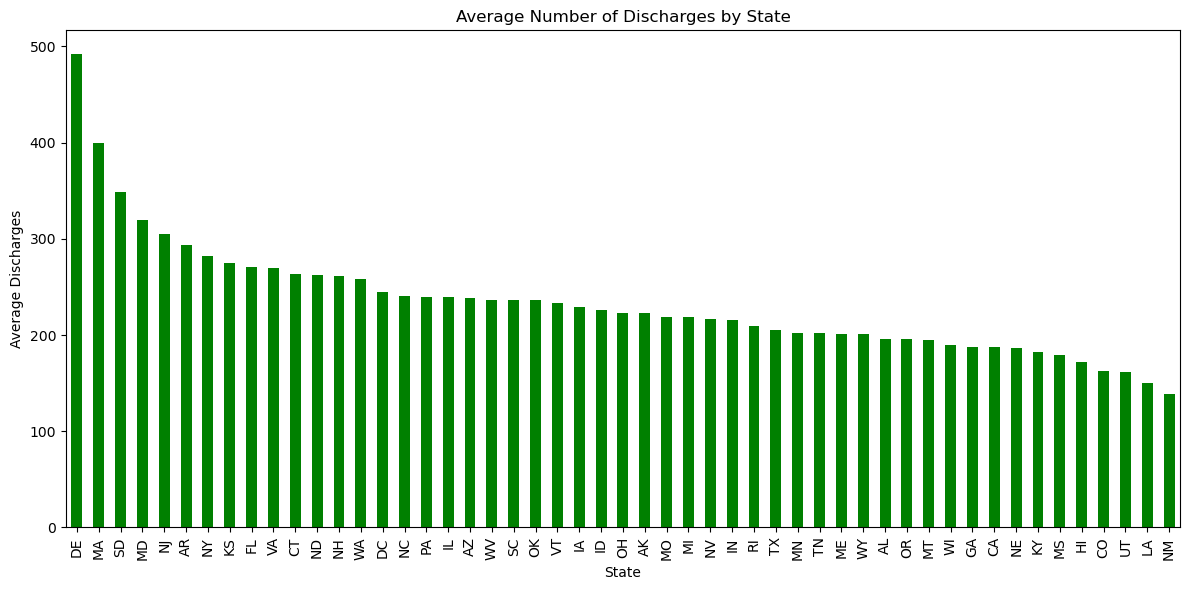

In [177]:
state_avg_discharges = df.groupby('State')['Number of Discharges'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_avg_discharges.plot(kind='bar', color='green')
plt.title('Average Number of Discharges by State')
plt.ylabel('Average Discharges')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [179]:
#Correlation between predicted and expected readmission rates

Correlation: 0.98


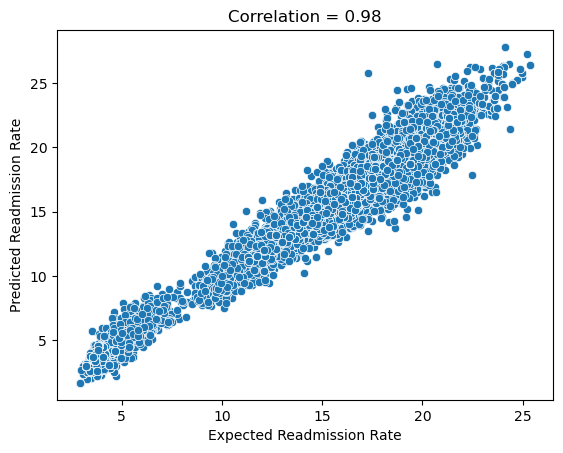

In [181]:
correlation = df['Predicted Readmission Rate'].corr(df['Expected Readmission Rate'])
print(f"Correlation: {correlation:.2f}")

sns.scatterplot(x='Expected Readmission Rate', y='Predicted Readmission Rate', data=df)
plt.title(f"Correlation = {correlation:.2f}")
plt.show()


In [183]:
# Which hospitals are performing better than expected?

In [185]:
better_hospitals = df[df['Predicted Readmission Rate'] < df['Expected Readmission Rate']]
better_hospitals[['Facility Name', 'Predicted Readmission Rate', 'Expected Readmission Rate']].head()


,Facility Name,Predicted Readmission Rate,Expected Readmission Rate
0,SOUTHEAST HEALTH MEDICAL CENTER,13.0146,13.7235
1,SOUTHEAST HEALTH MEDICAL CENTER,9.6899,10.1898
3,SOUTHEAST HEALTH MEDICAL CENTER,4.2680,4.4211
4,SOUTHEAST HEALTH MEDICAL CENTER,16.1137,16.5863
5,SOUTHEAST HEALTH MEDICAL CENTER,15.4544,16.5637


In [187]:
#What is the overall readmission ratio across all facilities?

In [189]:
overall_ratio = df['Excess Readmission Ratio'].mean()
print(f"Overall Excess Readmission Ratio: {overall_ratio:.2f}")


Overall Excess Readmission Ratio: 1.00


In [191]:
#Readmission rates across U.S. regions

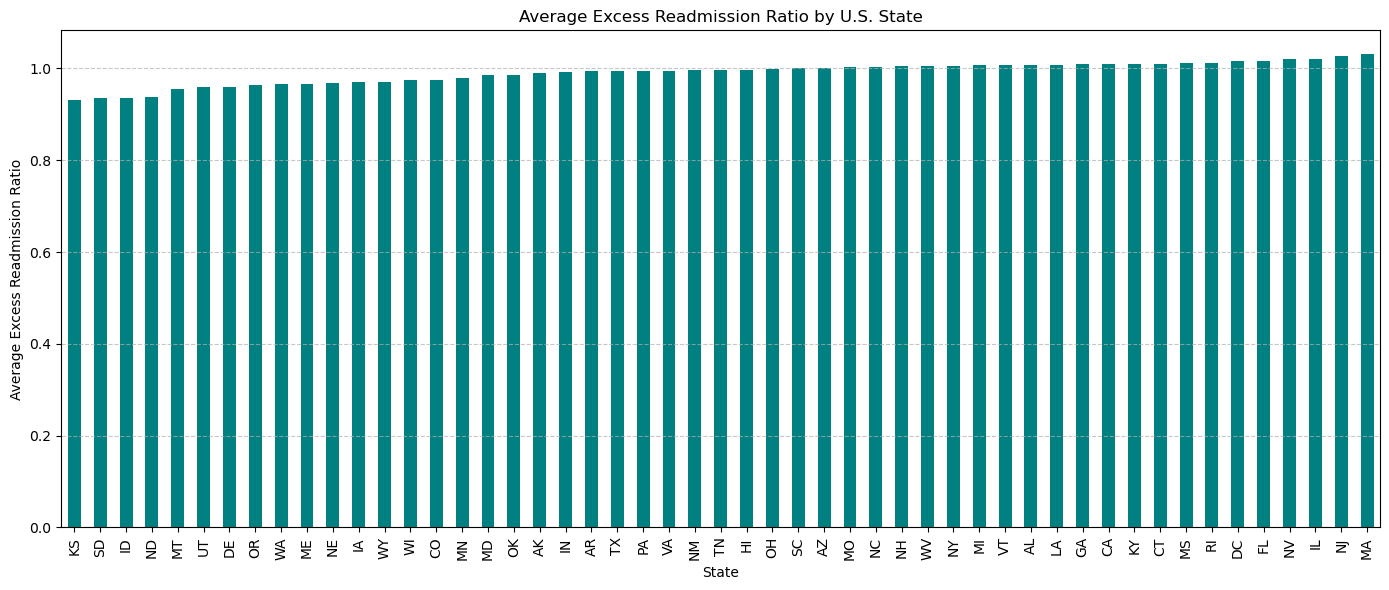

In [193]:
df_clean = df[['State', 'Excess Readmission Ratio']].dropna()
region_avg = df_clean.groupby('State')['Excess Readmission Ratio'].mean().sort_values()
plt.figure(figsize=(14, 6))
region_avg.plot(kind='bar', color='teal')
plt.title('Average Excess Readmission Ratio by U.S. State')
plt.xlabel('State')
plt.ylabel('Average Excess Readmission Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [194]:
#How many hospitals have a ratio above a threshold

In [196]:
threshold = 1.05
above_threshold = df[df['Excess Readmission Ratio'] > threshold]
print(f"Hospitals above threshold ({threshold}): {above_threshold.shape[0]}")


Hospitals above threshold (1.05): 3617


In [199]:
#Hospitals with the lowest predicted readmission rates

In [201]:
lowest_readmission = df_clean.sort_values(by='Excess Readmission Ratio', ascending=True)
print("Hospitals with the Lowest Predicted Readmission Rates:")
print(lowest_readmission.head(10))

Hospitals with the Lowest Predicted Readmission Rates:
      State  Excess Readmission Ratio
1925     CA                    0.4779
6565     KS                    0.5534
6566     KS                    0.5534
6703     KS                    0.5758
6704     KS                    0.5758
6705     KS                    0.5758
6706     KS                    0.5758
6707     KS                    0.5758
6708     KS                    0.5758
14226    PA                    0.5789


In [203]:
#Machine Learning - Predict Readmission Rat

In [211]:
features = ['Expected Readmission Rate', 'Number of Discharges', 'Excess Readmission Ratio']
X = df[features].dropna()
y = df.loc[X.index, 'Predicted Readmission Rate']


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [215]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [217]:
y_pred = model.predict(X_test)

In [219]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9897347859491503
RMSE: 0.4949090963110839


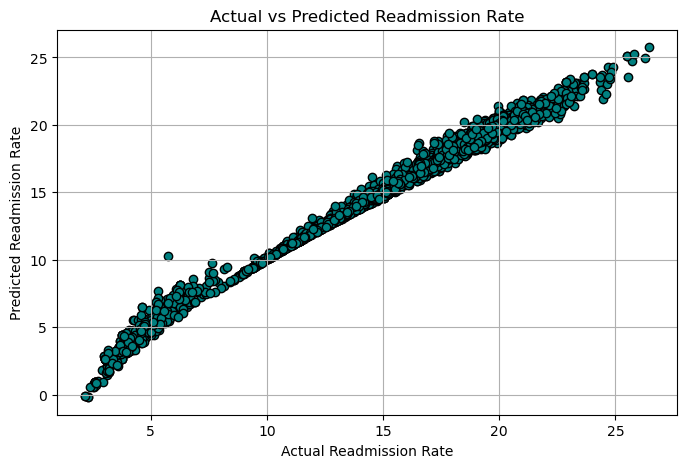

In [221]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', edgecolor='k')
plt.xlabel('Actual Readmission Rate')
plt.ylabel('Predicted Readmission Rate')
plt.title('Actual vs Predicted Readmission Rate')
plt.grid(True)
plt.show()